In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [51]:
def div_by_2(integer):
    'returns divisor=[floor, ceiling] '
    from math import floor, ceil
    divisors = np.zeros(2)
    if (integer%2)==0:
        divisors[0] = int(integer//2)
        divisors[1] = int(integer//2)
    else:
        divisors[0] = int(floor(integer/2))
        divisors[1] = int(ceil(integer/2))
    divisors = [int(item) for item in divisors]
    return (divisors)

In [52]:
def trimmed_data(dataframe, length):
    n_left = div_by_2(abs(len(dataframe)-length))[0]
    n_right = div_by_2(abs(len(dataframe)-length))[1]
    
    if len(dataframe)>length:
        df = dataframe.loc[n_left:len(dataframe)-n_right]
    else: 
        elem_left = pd.DataFrame(np.ones(div_by_2(abs(len(dataframe)-length))[0])*dataframe.iloc[0])
        elem_right = pd.DataFrame(np.ones(div_by_2(abs(len(dataframe)-length))[1])*dataframe.iloc[-1])
        df = pd.concat([dataframe, elem_right])
        df = pd.concat([elem_left, df])
    return(df)

In [67]:
def noise_generation(data, noise_level):
    """ This function creates a noisy curve from input file
    
    Inputs:
    data: Path to data file 
    noise_level: Ranges [0,1]. Acts as scalar multiple to be applied to SNR curve provided by M.T. Penny
    
    Returns:
    noisy_data: Data after noise application
    
    """
    snr_file = pd.read_csv('/mnt/c/Users/user/Desktop/Research/snr_curve.txt', sep=' ',header=None,names=['Mag', 'Mag Error'])
    snr_mag = snr_file['Mag']
    snr_mag_err = snr_file['Mag Error']

    y_post_noise = []
    for mag in data:
        for i in range(len(snr_mag)):
            if mag>snr_mag[i] and mag<=snr_mag[i+1]:
                y_true = mag + noise_level * np.random.normal(-snr_mag_err[i], snr_mag_err[i])
            else:
                y_true = mag
        y_post_noise.append(y_true)
    return(y_post_noise)

In [54]:
def normalization(arr):
    # Normalizes data via x_norm = (x-min)/(max-min)
    normed_arr = np.zeros(len(arr))
    for i in range(len(arr)):
        normed_arr[i] = (arr[i]-min(arr))/(max(arr)-min(arr))
    return(normed_arr)

# Raw Curves

In [72]:
# Raw
path = '/mnt/c/users/user/Desktop/Research/lc_data/'
raw_df1 = pd.read_csv(path+'TIC_TIC 304172886(RRC).csv')
raw_df2 = pd.read_csv(path+'TIC_TIC 31182240(DCEP).csv')
raw_df3 = pd.read_csv(path+'TIC_TIC 219401748(DSCT).csv')

# Full Noise

In [73]:
# Full Noise
path2 = '/mnt/c/users/user/Desktop/full_noise_var_normed_trimmed/'
noise_df1 = pd.read_csv(path2+'trimmed_normed_filtered_TIC 304172886(RRC).csv', header=None)
noise_df2 = pd.read_csv(path2+'trimmed_normed_filtered_TIC 31182240(DCEP).csv', header=None)
noise_df3 = pd.read_csv(path2+'trimmed_normed_filtered_TIC 219401748(DSCT).csv', header=None)

# Filtered

In [74]:
# Savgol Filter Only
path3 = '/mnt/c/users/user/Desktop/savgol_filter_lc_data/'
filter_df1 = pd.read_csv(path3+'filtered_TIC 304172886(RRC).csv')
filter_df2 = pd.read_csv(path3+'filtered_TIC 31182240(DCEP).csv')
filter_df3 = pd.read_csv(path3+'filtered_TIC 219401748(DSCT).csv')


# Trim and Noise

In [80]:
trim_df1 = trimmed_data(filter_df1, 1000)
trim_df2 = trimmed_data(filter_df2, 1000)
trim_df3 = trimmed_data(filter_df3, 1000)

noise_df1 = noise_generation(trim_df1['filter_mag'], 1)
noise_df2 = noise_generation(trim_df2['filter_mag'], 1)
noise_df3 = noise_generation(trim_df3['filter_mag'], 1)

anoise_df1 = noise_generation(trim_df1['filter_mag'], 0)
anoise_df2 = noise_generation(trim_df2['filter_mag'], 0)
anoise_df3 = noise_generation(trim_df3['filter_mag'], 0)

# Normalized

In [81]:
# Full Noise, Normed
norm_df1 = normalization(noise_df1)
norm_df2 = normalization(noise_df2)
norm_df3 = normalization(noise_df3)

# No Noise, Normed
anorm_df1 = normalization(anoise_df1)
anorm_df2 = normalization(anoise_df2)
anorm_df3 = normalization(anoise_df3)

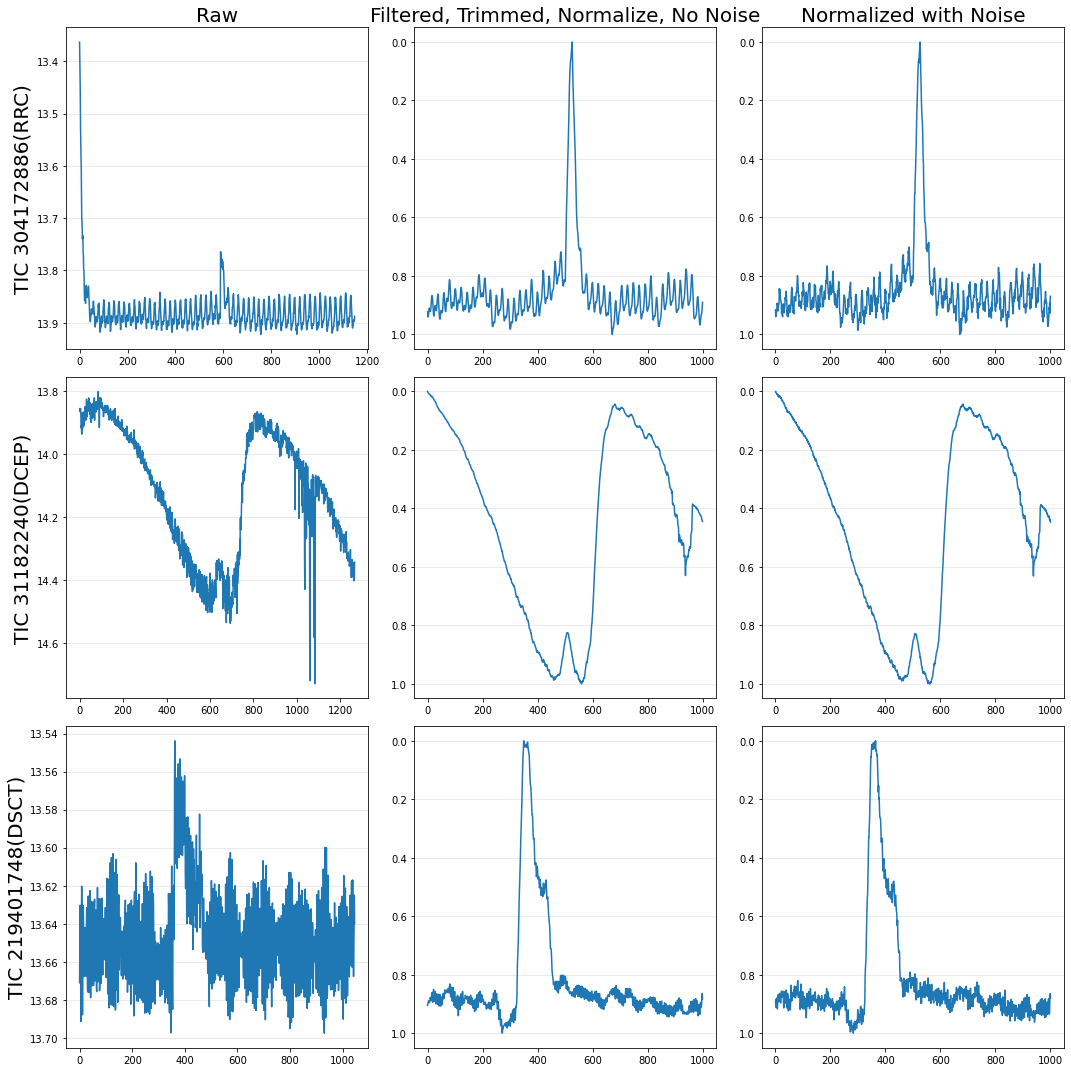

In [84]:
fig, axs = plt.subplots(3,3, figsize=(15,15))

# Plot Indices [row, column]
axs[0,0].plot(raw_df1['mag'])
axs[0,0].set_title('Raw', fontsize=20)
axs[0,0].grid(axis='y', alpha=0.3)

axs[1,0].plot(raw_df2['mag'])
axs[1,0].grid(axis='y', alpha=0.3)

axs[2,0].plot(raw_df3['mag'])
axs[2,0].grid(axis='y', alpha=0.3)

axs[0,1].plot(anorm_df1)
axs[0,1].set_title('Filtered, Trimmed, Normalize, No Noise', fontsize=20)
axs[0,1].grid(axis='y', alpha=0.3)

axs[1,1].plot(anorm_df2)
axs[1,1].grid(axis='y', alpha=0.3)

axs[2,1].plot(anorm_df3)
axs[2,1].grid(axis='y', alpha=0.3)

axs[0,2].plot(norm_df1)
axs[0,2].set_title('Normalized with Noise', fontsize=20)
axs[0,2].grid(axis='y', alpha=0.3)

axs[1,2].plot(norm_df2)
axs[1,2].grid(axis='y', alpha=0.3)

axs[2,2].plot(norm_df3)
axs[2,2].grid(axis='y', alpha=0.3)

for ax in axs.flat:
    ax.invert_yaxis()

axs[0,0].set_ylabel('TIC 304172886(RRC)', size=20)
axs[1,0].set_ylabel('TIC 31182240(DCEP)', size=20)
axs[2,0].set_ylabel('TIC 219401748(DSCT)', size=20)
#fig.supylabel('Magnitudes', fontstyle='oblique', fontsize=30)
#fig.supxlabel('Time Step', fontstyle='oblique', fontsize=30)
fig.tight_layout()
fig.savefig(fname='/mnt/c/users/user/Desktop/ThesisFigures/var_curves.png', bbox_inches='tight')

# Microlensing Figures

In [55]:
# t_0=3505.u_0=0.3888.t_E=7.1363.s=1.0.q=0.0505.alpha=321.rho=0.0257
# t_0=3517.u_0=0.1666.t_E=2.9134.s=1.0.q=0.1.alpha=100.rho=0.0257
# t_0=3512.u_0=0.5.t_E=2.2567.s=1.0.q=0.1.alpha=274.rho=0.1

raw_path = "/mnt/c/users/user/Desktop/mulens_no_noise_data_current2/" # Raw generation curves
nn_path = '/mnt/c/users/user/Desktop/full_noise_mulens_normed_current2/' # Noise and Normed

In [90]:
# Same order as above
mulens1 = pd.read_csv(raw_path+'t_0=3505.u_0=0.3888.t_E=7.1363.s=1.0.q=0.0505.alpha=321.rho=0.0257.csv')
mulens2 = pd.read_csv(raw_path+'t_0=3517.u_0=0.1666.t_E=2.9134.s=1.0.q=0.1.alpha=100.rho=0.0257.csv')
mulens3 = pd.read_csv(raw_path+'t_0=3512.u_0=0.5.t_E=2.2567.s=1.0.q=0.1.alpha=274.rho=0.1.csv')

# Noise/Normed curves
#noise1 = pd.read_csv(nn_path+'full_noise_cleaned_normed_t_0=3505.u_0=0.3888.t_E=7.1363.s=1.0.q=0.0505.alpha=321.rho=0.0257.csv')
#noise2 = pd.read_csv(nn_path+'full_noise_cleaned_normed_t_0=3517.u_0=0.1666.t_E=2.9134.s=1.0.q=0.1.alpha=100.rho=0.0257.csv')
#noise3 = pd.read_csv(nn_path+'full_noise_cleaned_normed_t_0=3512.u_0=0.5.t_E=2.2567.s=1.0.q=0.1.alpha=274.rho=0.1.csv')

In [91]:
mulens1['mag']

0      23.869417
1      23.867593
2      23.865881
3      23.864159
4      23.862426
         ...    
995    24.123772
996    24.123816
997    24.123860
998    24.123903
999    24.123947
Name: mag, Length: 1000, dtype: float64

In [92]:
noise1 = noise_generation(mulens1['mag'], 1)
noise2 = noise_generation(mulens2['mag'], 1)
noise3 = noise_generation(mulens3['mag'], 1)

In [93]:
norm1 = normalization(noise1)
norm2 = normalization(noise2)
norm3 = normalization(noise3)

In [94]:
anorm1 = normalization(mulens1['mag'].values)
anorm2 = normalization(mulens2['mag'])
anorm3 = normalization(mulens3['mag'])

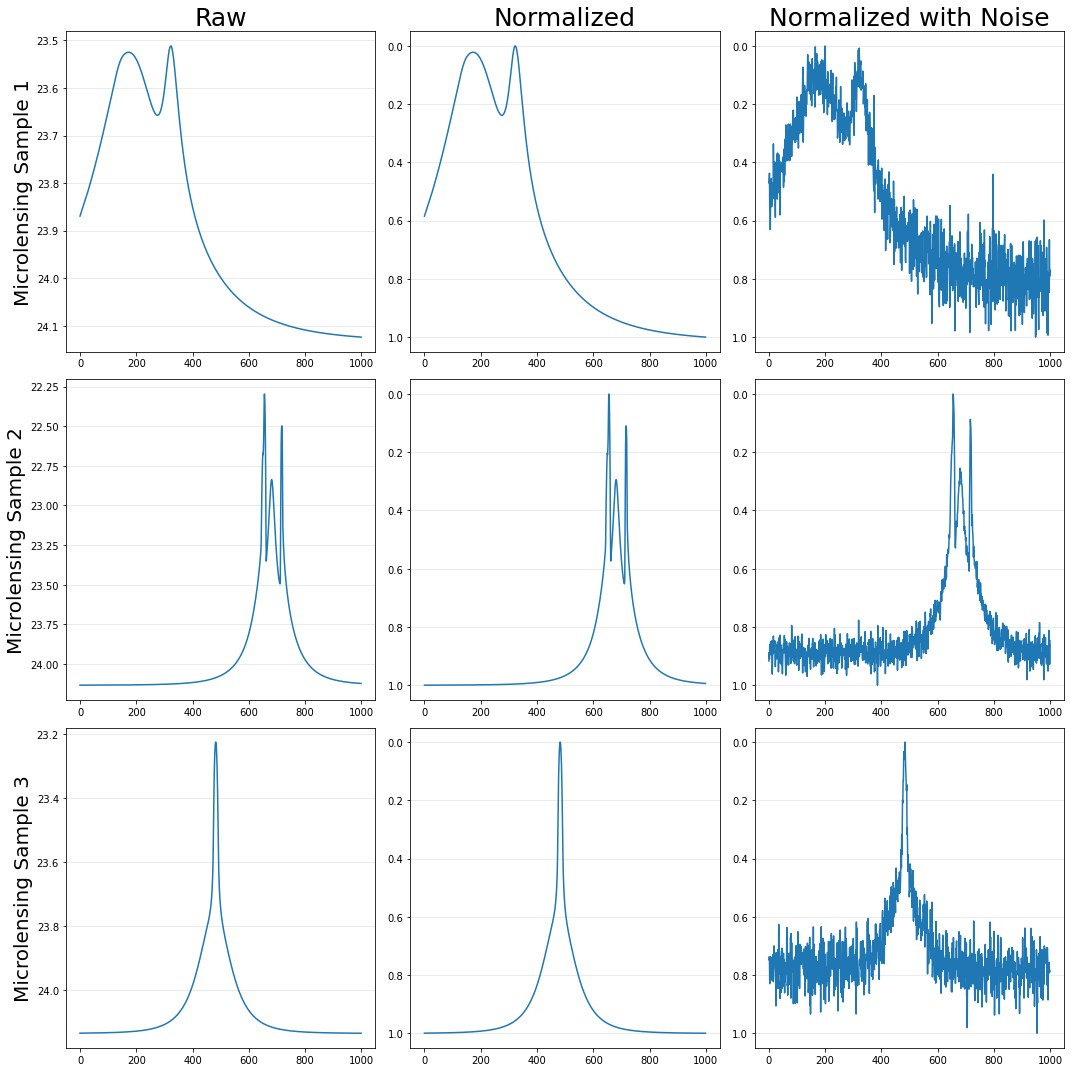

In [96]:
fig, axs = plt.subplots(3,3, figsize=(15,15))

axs[0,0].plot(mulens1['mag'])
axs[0,0].set_title('Raw', fontsize=25)
axs[0,0].grid(axis='y', alpha=0.3)

axs[1,0].plot(mulens2['mag'])
axs[1,0].grid(axis='y', alpha=0.3)

axs[2,0].plot(mulens3['mag'])
axs[2,0].grid(axis='y', alpha=0.3)

axs[0,1].plot(anorm1)
axs[0,1].set_title('Normalized', fontsize=25)
axs[0,1].grid(axis='y', alpha=0.3)

axs[1,1].plot(anorm2)
axs[1,1].grid(axis='y', alpha=0.3)

axs[2,1].plot(anorm3)
axs[2,1].grid(axis='y', alpha=0.3)

axs[0,2].plot(norm1)
axs[0,2].set_title('Normalized with Noise', fontsize=25)
axs[0,2].grid(axis='y', alpha=0.3)

axs[1,2].plot(norm2)
axs[1,2].grid(axis='y', alpha=0.3)

axs[2,2].plot(norm3)
axs[2,2].grid(axis='y', alpha=0.3)

for ax in axs.flat:
    ax.invert_yaxis()
    
axs[0,0].set_ylabel('Microlensing Sample 1', size=20)
axs[1,0].set_ylabel('Microlensing Sample 2', size=20)
axs[2,0].set_ylabel('Microlensing Sample 3', size=20)

fig.tight_layout()
fig.savefig(fname='/mnt/c/users/user/Desktop/ThesisFigures/mulens_curves.png', bbox_inches='tight')

# Final Curves Examples

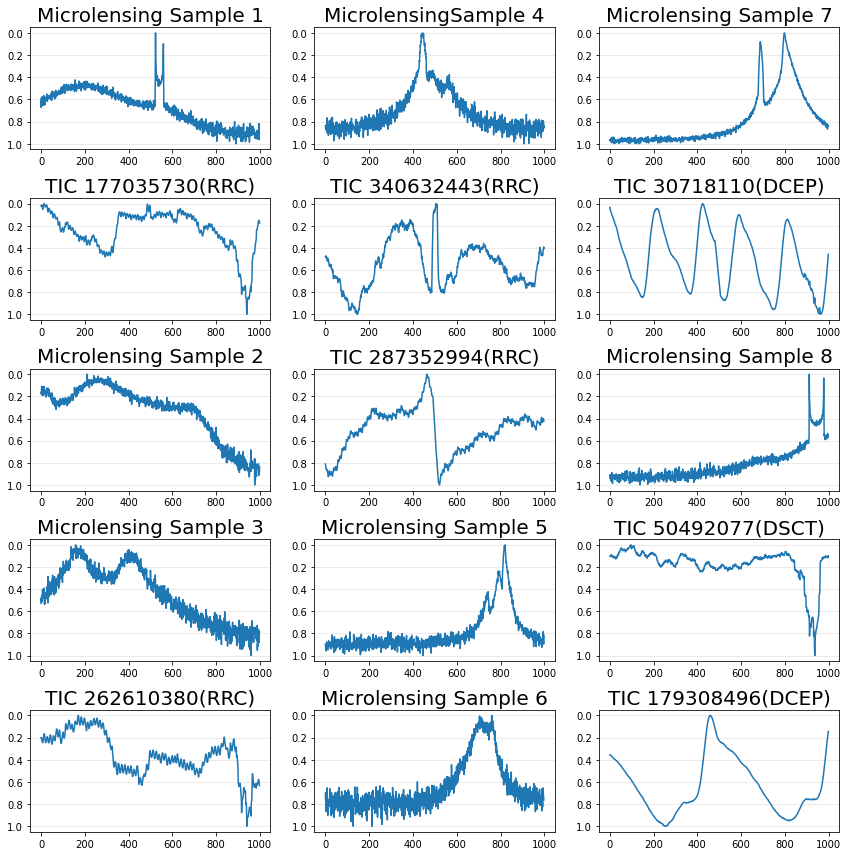

In [86]:
fig, axs = plt.subplots(5,3, figsize=(12,12))

# Microlensing Examples
mulens1 = 't_0=3504.u_0=0.2777.t_E=15.957.s=0.7525.q=0.0505.alpha=193.rho=0.001'
mulens2 = 't_0=3505.u_0=0.1666.t_E=19.072.s=0.7525.q=0.0752.alpha=208.rho=0.0505'
mulens3 = 't_0=3507.u_0=0.2777.t_E=16.820.s=0.7525.q=0.0257.alpha=93.rho=0.0752'
mulens4 = 't_0=3512.u_0=0.2777.t_E=5.0461.s=1.0.q=0.0752.alpha=110.rho=0.0752'
mulens5 = 't_0=3520.u_0=0.1666.t_E=3.4821.s=1.0.q=0.1.alpha=66.rho=0.0505'#
mulens6 = 't_0=3518.u_0=0.2777.t_E=3.4821.s=0.7525.q=0.1.alpha=322.rho=0.0257'
mulens7 = 't_0=3520.u_0=-0.277.t_E=5.0461.s=0.7525.q=0.0257.alpha=305.rho=0.0257'
mulens8 = 't_0=3523.u_0=0.2777.t_E=9.2129.s=1.0.q=0.1.alpha=194.rho=0.001'

# Variable Examples
var1 = 'TIC 177035730(RRC)'
var2 = 'TIC 262610380(RRC)'
var3 = 'TIC 340632443(RRC)'
var4 = 'TIC 287352994(RRC)' #
var5 = 'TIC 30718110(DCEP)'
var6 = 'TIC 50492077(DSCT)'
var7 = 'TIC 179308496(DCEP)'

# Paths
path_var = "/mnt/c/users/user/Desktop/full_noise_var_normed_trimmed/"
path_mulens = "/mnt/c/users/user/Desktop/full_noise_mulens_normed_current2/"

# Additional Path
var_path_add = 'trimmed_normed_filtered_'
mulens_path_add = 'full_noise_cleaned_normed_'

# Microlensing Data
mulens1_dat = pd.read_csv(path_mulens+mulens_path_add+mulens1+'.csv')
mulens2_dat = pd.read_csv(path_mulens+mulens_path_add+mulens2+'.csv')
mulens3_dat = pd.read_csv(path_mulens+mulens_path_add+mulens3+'.csv')
mulens4_dat = pd.read_csv(path_mulens+mulens_path_add+mulens4+'.csv')
mulens5_dat = pd.read_csv(path_mulens+mulens_path_add+mulens5+'.csv')
mulens6_dat = pd.read_csv(path_mulens+mulens_path_add+mulens6+'.csv')
mulens7_dat = pd.read_csv(path_mulens+mulens_path_add+mulens7+'.csv')
mulens8_dat = pd.read_csv(path_mulens+mulens_path_add+mulens8+'.csv')
# Variable Data

var1_dat = pd.read_csv(path_var+var_path_add+var1+'.csv')
var2_dat = pd.read_csv(path_var+var_path_add+var2+'.csv')
var3_dat = pd.read_csv(path_var+var_path_add+var3+'.csv')
var4_dat = pd.read_csv(path_var+var_path_add+var4+'.csv')
var5_dat = pd.read_csv(path_var+var_path_add+var5+'.csv')
var6_dat = pd.read_csv(path_var+var_path_add+var6+'.csv')
var7_dat = pd.read_csv(path_var+var_path_add+var7+'.csv')

# Index is [row, column]
axs[0,0].plot(mulens1_dat)
axs[0,0].set_title('Microlensing Sample 1', fontsize=20)
axs[0,0].grid(axis='y', alpha=0.3)

axs[1,0].plot(var1_dat)
axs[1,0].set_title('TIC 177035730(RRC)', fontsize=20)
axs[1,0].grid(axis='y', alpha=0.3)

axs[2,0].plot(mulens2_dat)
axs[2,0].set_title('Microlensing Sample 2', fontsize=20)
axs[2,0].grid(axis='y', alpha=0.3)

axs[3,0].plot(mulens3_dat)
axs[3,0].set_title('Microlensing Sample 3', fontsize=20)
axs[3,0].grid(axis='y', alpha=0.3)

axs[4,0].plot(var2_dat)
axs[4,0].set_title('TIC 262610380(RRC)', fontsize=20)
axs[4,0].grid(axis='y', alpha=0.3)

axs[0,1].plot(mulens4_dat)
axs[0,1].set_title('MicrolensingSample 4', fontsize=20)
axs[0,1].grid(axis='y', alpha=0.3)

axs[1,1].plot(var3_dat)
axs[1,1].set_title('TIC 340632443(RRC)', fontsize=20)
axs[1,1].grid(axis='y', alpha=0.3)

axs[2,1].plot(var4_dat)
axs[2,1].set_title('TIC 287352994(RRC)', fontsize=20)
axs[2,1].grid(axis='y', alpha=0.3)

axs[3,1].plot(mulens5_dat)
axs[3,1].set_title('Microlensing Sample 5', fontsize=20)
axs[3,1].grid(axis='y', alpha=0.3)

axs[4,1].plot(mulens6_dat)
axs[4,1].set_title('Microlensing Sample 6', fontsize=20)
axs[4,1].grid(axis='y', alpha=0.3)

axs[0,2].plot(mulens7_dat)
axs[0,2].set_title('Microlensing Sample 7', fontsize=20)
axs[0,2].grid(axis='y', alpha=0.3)

axs[1,2].plot(var5_dat)
axs[1,2].set_title('TIC 30718110(DCEP)', fontsize=20)
axs[1,2].grid(axis='y', alpha=0.3)

axs[2,2].plot(mulens8_dat)
axs[2,2].set_title('Microlensing Sample 8', fontsize=20)
axs[2,2].grid(axis='y', alpha=0.3)

axs[3,2].plot(var6_dat)
axs[3,2].set_title('TIC 50492077(DSCT)', fontsize=20)
axs[3,2].grid(axis='y', alpha=0.3)

axs[4,2].plot(var7_dat)
axs[4,2].set_title('TIC 179308496(DCEP)', fontsize=20)
axs[4,2].grid(axis='y', alpha=0.3)

for ax in axs.flat:
    ax.invert_yaxis()


#fig.supylabel('Magnitudes', fontstyle='oblique', fontsize=30)
#fig.supxlabel('Time Step', fontstyle='oblique', fontsize=30)
fig.tight_layout()
fig.savefig(fname='/mnt/c/users/user/Desktop/ThesisFigures/final_samples.png', bbox_inches='tight')

In [16]:
var1_dat.values

array([[7.46474017e-01],
       [7.41866391e-01],
       [7.35245213e-01],
       [7.28730858e-01],
       [7.24594028e-01],
       [7.18798768e-01],
       [7.12748006e-01],
       [7.05179215e-01],
       [6.97533379e-01],
       [6.90852858e-01],
       [6.82950912e-01],
       [6.75947664e-01],
       [6.67230836e-01],
       [6.58049053e-01],
       [6.49967897e-01],
       [6.41971527e-01],
       [6.31343240e-01],
       [6.21287305e-01],
       [6.11932046e-01],
       [6.01718081e-01],
       [5.92307672e-01],
       [5.82039524e-01],
       [5.70534721e-01],
       [5.58418076e-01],
       [5.47755065e-01],
       [5.35042453e-01],
       [5.23844968e-01],
       [5.13056070e-01],
       [5.01787381e-01],
       [4.88083187e-01],
       [4.76037136e-01],
       [4.63170757e-01],
       [4.50611267e-01],
       [4.37922341e-01],
       [4.23925951e-01],
       [4.11345425e-01],
       [3.98338932e-01],
       [3.84834373e-01],
       [3.71553960e-01],
       [3.58649811e-01],


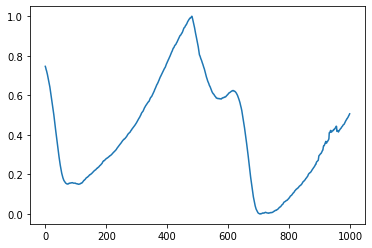

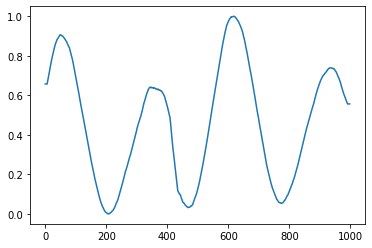

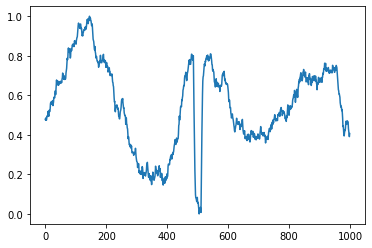

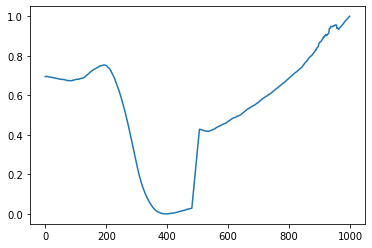

In [11]:
plt.plot(var1_dat)
plt.show()
plt.plot(var2_dat)
plt.show()
plt.plot(var3_dat)
plt.show()

plt.plot(var4_dat)
plt.show()

